# Tra Dinh - Stanford Open Policing Project

In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Stanford Open Policing Project

The [Stanford Open Policing Project](https://openpolicing.stanford.edu/) collects and standardizes data on vehicle and pedestrian stops from law enforcement departments across the United States.  They have gathered over 200 million records from dozens of state and local police departments across the country.  In this project, we will examine a subset of the data from the state of Rhode Island, which is the smallest US state in size.

<div class="exercise"><b>Task 1: Loading and Examining Traffic Stop Data</b></div> 

To start analyzing the traffic stop data from Rhode Island, we first need to import the necessary Pandas library. Next, we will read the traffic.csv file from the project1Data folder and assign it to the data frame named traffic. To get an initial understanding of the data, we will print the first 5 rows of the data frame to familiarize ourselves with the columns. Similarly, we will print the last 5 rows to ensure we have a comprehensive view of the dataset. Finally, we will print the shape of the data frame to know the number of rows and columns present in the dataset. 

In [4]:
import pandas as pd
traffic = pd.read_csv("project1Data/traffic.csv") 
print(traffic.head())
print(traffic.tail())
print(traffic.shape)

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

<div class="exercise"><b>Task 2: Count Number of Missing Values</b></div> 

There were a lot of missing values in the data frame as indicated by the `NaN` values.  We are now interested in determining how many missing values there are in our data set.  We can check this calling the chained-method `.isnull().sum()` of the `traffic` data frame.  

In [5]:
print(traffic.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


# Data Frame Mutations

<div class="exercise"><b>Task 3: Drop Unneeded Columns</b></div> 

Upon observing the `traffic` data frame, it becomes clear that the `county_name` column only contains missing values, rendering it unnecessary. Additionally, since the data focuses exclusively on the state of Rhode Island, the `state` column is redundant. Therefore, we will drop both the `county_name` and `state` columns from the `traffic` data frame. These columns will be removed in place to ensure they are permanently deleted from the data frame. Below is the Python code to achieve this:

In [22]:
traffic.drop(columns=['county_name', 'state'], inplace = True)

<div class="exercise"><b>Task 4: Drop Rows with Missing Values</b></div> 


In this project we are going to focus on the differences between genders with regards to traffic stops.  Therefore, the `driver_gender` column will be critical to many of our analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

In [6]:
print(traffic.dropna(subset=['driver_gender'], inplace=True))
print(traffic.isnull().sum())
print(traffic.shape)

None
state                     0
stop_date                 0
stop_time                 0
county_name           86536
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 15)


<div class="exercise"><b>Task 5: Change a Data Type</b></div> 

When performing data analysis, it's crucial to ensure the correct data types are being used to avoid unexpected results or errors. The `pd.read_csv()` function in Pandas typically infers the appropriate data types, allowing you to proceed with your analysis without further consideration. However, this automatic inference isn't always accurate.

In [7]:
# Display column dtypes
traffic.dtypes

state                  object
stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
district               object
dtype: object

To verify that the `is_arrested` column contains `True` and `False` values and to check its data type, we will first print the head of this column. Next, we will use the `.astype()` method to convert the `is_arrested` column to a `bool` data type. Finally, we will print the head of the updated `is_arrested` column to confirm the successful conversion. Below is the Python code to achieve this:

In [8]:
print(traffic.is_arrested.head())
traffic.is_arrested = traffic.is_arrested.astype('bool')
print(traffic.is_arrested.head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: bool


# Examining Traffic Violations

<div class="exercise"><b>Task 6: Count and Proportion of Violations</b></div> 

We begin by examining the violations committed by *all* drivers to get a baseline understanding of the data.

I'll count the unique values in the `violation` column, and then separately express those counts as proportions. 

In [9]:
violation_counts = traffic.violation.value_counts()
violation_proportions = traffic.violation.value_counts(normalize=True)
print(violation_counts)
print(violation_proportions)

violation
Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: count, dtype: int64
violation
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: proportion, dtype: float64


<div class="exercise"><b>Task 7: Violations by Gender</b></div> 

We are now interested in determining whether male and female drivers tend to commit different types of traffic violations.

In [10]:
traffic.groupby('driver_gender')['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658114
               Moving violation       0.138218
               Equipment              0.105199
               Registration/plates    0.044418
               Other                  0.029738
               Seat belt              0.024312
M              Speeding               0.522243
               Moving violation       0.206144
               Equipment              0.134158
               Other                  0.058985
               Registration/plates    0.042175
               Seat belt              0.036296
Name: proportion, dtype: float64

<div class="exercise"><b>Task 8: Speeding Outcomes by Gender</b></div> 

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a `Citation` (ticket) or a `Warning`. Can you find evidence of this in the dataset?

In the code cell below, write Python code to do the following.<br>

- Create a data frame called `speeding` that contains only those rows of `traffic` for which the `violations` column is `Speeding`.
- Write a single line of code that displays the proportions of the different stop outcomes (`stop_outcome`) that resulted from females and males stopped for speeding, respectively.  To accomplish this, you will once again link the `groupby()` and `value_counts()` methods together as in Item #9 of the [article](https://re-thought.com/pandas-value_counts/) from the last task, but only for the `stop_outcome` column.  You'll also need to set the `normalize=True` parameter.

The output from my solution is:<br>
<code>
driver_gender  stop_outcome    
F              Citation            0.952192
               Warning             0.040074
               Arrest Driver       0.005752
               N/D                 0.000959
               Arrest Passenger    0.000639
               No Action           0.000383
M              Citation            0.944595
               Warning             0.036184
               Arrest Driver       0.015895
               Arrest Passenger    0.001281
               No Action           0.001068
               N/D                 0.000976
Name: stop_outcome, dtype: float64
</code>

In [28]:
speeding = traffic[traffic['violation'] == 'Speeding']
proportions = speeding.groupby('driver_gender')['stop_outcome'].value_counts(normalize=True)
print(proportions)

driver_gender  stop_outcome    
F              Citation            0.952192
               Warning             0.040074
               Arrest Driver       0.005752
               N/D                 0.000959
               Arrest Passenger    0.000639
               No Action           0.000383
M              Citation            0.944595
               Warning             0.036184
               Arrest Driver       0.015895
               Arrest Passenger    0.001281
               No Action           0.001068
               N/D                 0.000976
Name: proportion, dtype: float64


<div class="exercise"><b>Task 9: Examining Search Rate by Gender</b></div> 

During a traffic stop, the police officer sometimes conducts a search of the vehicle. First, we will compute the percentage of all stops in the data set that result in a vehicle search, also known as the *search rate*.  Second, we will compare the rates at which female and male drivers are searched during a traffic stop.

In [11]:
# Overall proportion of traffic stops resulting in a search
overall_search_rate = traffic.search_conducted.value_counts(normalize=True)
print(overall_search_rate)
# Search rate by gender
search_rate_by_gender = traffic.groupby('driver_gender')['search_conducted'].mean()
print(search_rate_by_gender)

search_conducted
False    0.961785
True     0.038215
Name: proportion, dtype: float64
driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


<div class="exercise"><b>Task 10: Search Rates by Violation Type</b></div> 

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.  For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

In [12]:
# Group by violation and driver gender, then calculate the search rate
search_rate = traffic.groupby(['violation', 'driver_gender'])['search_conducted'].mean()
print(search_rate)

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


<div class="exercise"><b>Task 11: Examining Frisk Rates</b></div> 

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In the code cell below, use the `.value_counts()` method applied to the `search_type` column to see the different types of searches contained in the data and the counts of these different searches (do not normalize).

In [13]:
search_types_counts = traffic.search_type.value_counts()
print(search_types_counts)

search_type
Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Pro

In [20]:
# Create a new column 'frisk' indicating if a frisk occurred during a stop
traffic.frisk = traffic.search_type.str.contains('Protective Frisk', na=False)

#Print out
print("The total number of frisks was", traffic.frisk.sum())

The total number of frisks was 303


# Violations by District

The state of Rhode Island is broken into six police districts, also known as *zones*. How do the zones compare in terms of what violations are caught by police?

<div class="exercise"><b>Task 13: Comparing Violations by District</b></div> 

In [22]:
# Create a frequency table for violations in each district
all_zones = pd.crosstab(traffic.district, traffic.violation)

# Select rows 'Zone K1' through 'Zone K3' from the all_zones table
k_zones = all_zones.loc['Zone K1':'Zone K3']

# Print the k_zones table
print(k_zones)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


Visualizing the data to help you compare what violations are being caught in each zone.

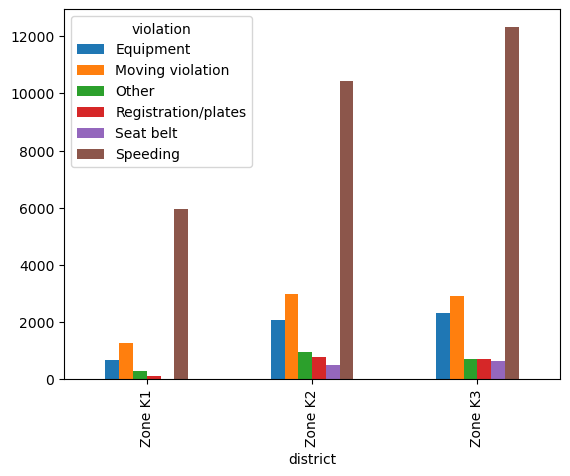

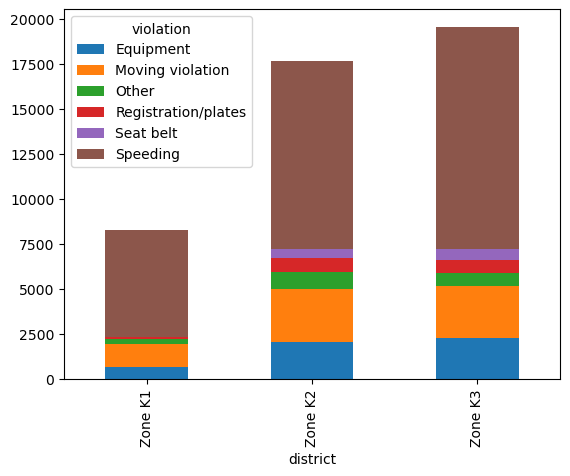

In [23]:
all_zones = pd.crosstab(traffic.district, traffic.violation)
k_zones = all_zones.loc['Zone K1':'Zone K3']
# Standard bar chart
k_zones.plot(kind='bar')
plt.legend(title='violation')
plt.show()

# Stacked bar chart
k_zones.plot(kind='bar', stacked=True)
plt.legend(title='violation')
plt.show()

# Date-Time Format

Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.  It will be beneficial to combine these two columns into a single column and then convert it to `datetime` format.  This will enable convenient date-based attributes.

In [24]:
# Concatenate columns
combined = traffic['stop_date'].str.cat(traffic['stop_time'], sep=' ')

# Convert combined to datetime format and store in a new column
traffic['stop_datetime'] = pd.to_datetime(combined)

# Verify the result
print(traffic['stop_datetime'].head())

0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: stop_datetime, dtype: datetime64[ns]


It makes sense to set the `stop_datetime` column as the data frames `index`. By replacing the default `index` with a `DatetimeIndex`, it will make it easier to analyze the data by date and time.

In the code cell below, write Python code to do the following.<br>

- Set `stop_datetime` as the `index` of `traffic` using the `.set_index()` method--be sure to do it *in place*.
- Print `traffic.head()` to verify that `stop_datetime` is no longer a column in `traffic`.

The output from my solution is as follows:<br>

<code>
                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   
</code><code>
                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   
</code><code>
                     search_conducted search_type   stop_outcome  is_arrested  \
stop_datetime                                                                   
2005-01-04 12:55:00             False         NaN       Citation        False   
2005-01-23 23:15:00             False         NaN       Citation        False   
2005-02-17 04:15:00             False         NaN       Citation        False   
2005-02-20 17:15:00             False         NaN  Arrest Driver         True   
2005-02-24 01:20:00             False         NaN       Citation        False   
</code><code>
                    stop_duration  drugs_related_stop district  frisk  
stop_datetime                                                          
2005-01-04 12:55:00      0-15 Min               False  Zone X4  False  
2005-01-23 23:15:00      0-15 Min               False  Zone K3  False  
2005-02-17 04:15:00      0-15 Min               False  Zone X4  False  
2005-02-20 17:15:00     16-30 Min               False  Zone X1  False  
2005-02-24 01:20:00      0-15 Min               False  Zone X3  False   
</code>

In [25]:
# Set stop_datetime as the index of traffic
traffic.set_index('stop_datetime', inplace=True)

# Verify the result
print(traffic.head())

                    state   stop_date stop_time  county_name driver_gender  \
stop_datetime                                                                
2005-01-04 12:55:00    RI  2005-01-04     12:55          NaN             M   
2005-01-23 23:15:00    RI  2005-01-23     23:15          NaN             M   
2005-02-17 04:15:00    RI  2005-02-17     04:15          NaN             M   
2005-02-20 17:15:00    RI  2005-02-20     17:15          NaN             M   
2005-02-24 01:20:00    RI  2005-02-24     01:20          NaN             F   

                    driver_race                   violation_raw  violation  \
stop_datetime                                                                
2005-01-04 12:55:00       White  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00       White                        Speeding   Speeding   
2005-02-17 04:15:00       White                        Speeding   Speeding   
2005-02-20 17:15:00       White                Call for Service

# Further Analysis Using Date and Time

<div class="exercise"><b>Task 15: Investigating Hourly Arrest Rate</b></div> 

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the *arrest rate*. We are interested in determining if the arrest rate varies by time of day.

The overall arrest rate is 0.0355690117407784

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


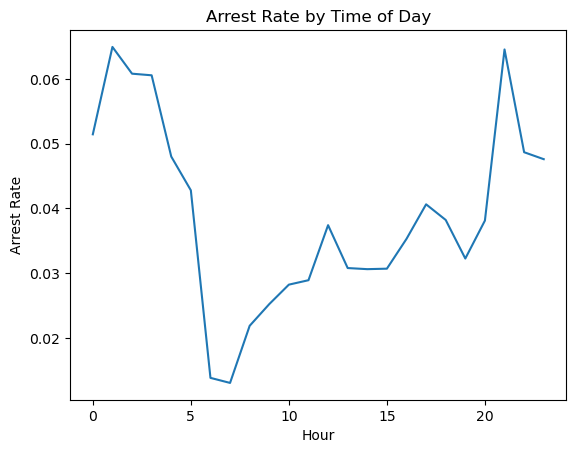

In [26]:
# Calculate and print the overall arrest rate
overallArrestRate = traffic.is_arrested.mean()
print('The overall arrest rate is ' + str(overallArrestRate) + '\n')

# Calculate and print the hourly arrest rate
hourly_arrest_rate = traffic.groupby(traffic.index.hour).is_arrested.mean()
print(hourly_arrest_rate)

# Create a line plot of 'hourly_arrest_rate'
import matplotlib.pyplot as plt
plt.plot(hourly_arrest_rate)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

# Examining Stop Durations

In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. If we want to analyze this data we will need to convert this column into a more useful form.

<div class="exercise"><b>Task 16: Converting Stop Durations to Numbers</b></div> 

Let's convert the stop durations to integers, which will allow us to better analyze them. Because the precise durations are not available, we will have to estimate the numbers using *reasonable* values.  Specifically, we will use the following conversions:<br>

    Convert '0-15 Min' to 8
    Convert '16-30 Min' to 23
    Convert '30+ Min' to 45

That is, we will estimate that stops in the `'0-15 Min'` group lasted 8 minutes, those in the `'16-30 Min'` group took 23 minutes, and those in the `'30+ Min'` group took 45 minutes.

In [27]:
# Create a dictionary mapping stop_duration strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert stop_duration strings to integers using mapping and store the results in a new column stop_minutes
traffic['stop_minutes'] = traffic['stop_duration'].map(mapping)

# Print the first 10 rows
print(traffic[['stop_duration', 'stop_minutes']].head(10))

                    stop_duration  stop_minutes
stop_datetime                                  
2005-01-04 12:55:00      0-15 Min             8
2005-01-23 23:15:00      0-15 Min             8
2005-02-17 04:15:00      0-15 Min             8
2005-02-20 17:15:00     16-30 Min            23
2005-02-24 01:20:00      0-15 Min             8
2005-03-14 10:00:00      0-15 Min             8
2005-03-29 21:55:00      0-15 Min             8
2005-04-04 21:25:00      0-15 Min             8
2005-07-14 11:20:00      0-15 Min             8
2005-07-14 19:55:00      0-15 Min             8


<div class="exercise"><b>Task 17: Plotting Stop Lengths</b></div> 

If you were stopped for a particular violation, how long might you expect to be detained?

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


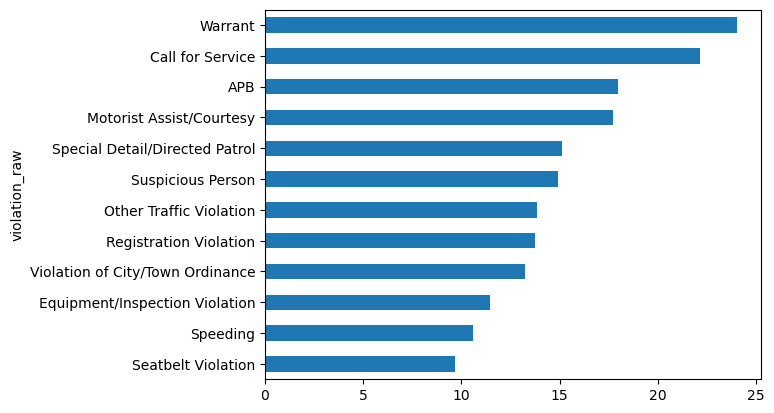

In [28]:
# Calculate the mean stop_minutes for each violation_raw
stop_length = traffic.groupby('violation_raw')['stop_minutes'].mean()

# Print stop_length
print(stop_length)

# Sort stop_length by values and visualize with a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
plt.show()

# The Effect of Temperature

We now wish to assess the effect of weather on the arrest rate. For the remainder of this project we will be working with a new data set to help us determine if weather conditions have an impact on police behavior.  The weather data we will be using was collected by the [National Centers for Environmental Information](https://www.ncei.noaa.gov/). 

We are interested in determining if weather conditions impact police behavior during traffic stops.  Ideally, we would look up the historical weather at the location of each stop. However, the traffic stops data set does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a *general idea* of the weather throughout the state.

In [29]:
weather = pd.read_csv("project1Data/weather.csv")
print(weather.head())

       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]


<div class="exercise"><b>Task 19: Categorizing Weather Days</b></div> 

Let's try to quantify how "bad" the weather was each day by counting the number of 1 values in each row.

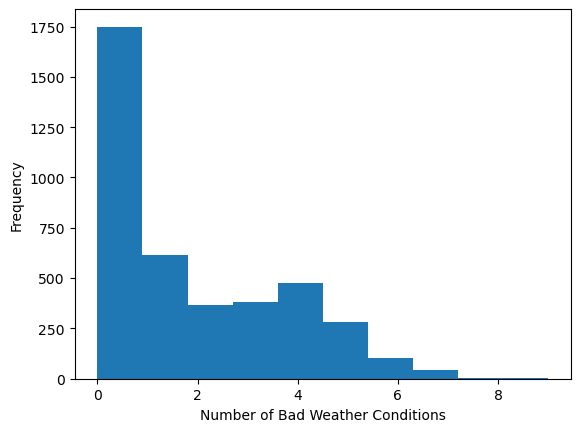

In [37]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')
plt.xlabel('Number of Bad Weather Conditions')

# Display the plot
plt.show()

In [38]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather['bad_conditions'].map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

rating
bad      1836
good     1749
worse     432
Name: count, dtype: int64


<div class="exercise"><b>Task 21: Preparing to Merge the Data Frames</b></div> 

Before we can determine if weather conditions have an impact on police behavior, we need to merge our `traffic` and `weather` data frames.  In this task we will prepare the data frames to be merged.

In [41]:
# Reset the index of 'traffic'
traffic.reset_index(inplace=True)

# Create a DataFrame called 'weather_rating' from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


<div class="exercise"><b>Task 22: Merging the Data Frames</b></div> 

We are now ready to merge the `traffic` and `weather_rating` data frames. The data frames will be joined using the `stop_date` column from `traffic` and the `DATE` column from `weather_rating`. Thankfully, the date formatting matches exactly, which is not always the case!

In [42]:
# Merge 'traffic' and 'weather_rating' using a left join
traffic_weather = pd.merge(traffic, weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Set 'stop_datetime' as the index of 'traffic_weather'
traffic_weather.set_index('stop_datetime', inplace=True)

# Print the head of 'traffic_weather'
print(traffic_weather[['stop_date', 'DATE', 'rating']].head())

# Examine the shape of 'traffic_weather'
print("The shape of the data frame is", traffic_weather.shape)

                      stop_date        DATE rating
stop_datetime                                     
2005-01-04 12:55:00  2005-01-04  2005-01-04    bad
2005-01-23 23:15:00  2005-01-23  2005-01-23  worse
2005-02-17 04:15:00  2005-02-17  2005-02-17   good
2005-02-20 17:15:00  2005-02-20  2005-02-20    bad
2005-02-24 01:20:00  2005-02-24  2005-02-24    bad
The shape of the data frame is (86536, 20)


<div class="exercise"><b>Task 23: Comparing Arrest Rates by Weather Rating</b></div> 

We are finally ready to examine if police officers arrest drivers more often when the weather is bad.

In [43]:
# Save the output of the groupby operation from the last exercise
arrest_rate = traffic_weather.groupby(['violation', 'rating']).is_arrested.mean()
print(arrest_rate)

violation            rating
Equipment            bad       0.066311
                     good      0.059007
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076966
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013405
                     worse     0.016886
Name: is_arrested, dtype: float64


<div class="exercise"><b>Task 24: Reshaping the Arrest Data</b></div> 

First, note that since we previously defined a logical order for the weather categories, `good < bad < worse`, our results were sorted in that way.

Second, note that the output of the single `.groupby()` operation on multiple columns is a `Series` with a `MultiIndex`.  Specifically, the `arrest_rate` object from the last task is a `MultiIndex` `Series`.

Let's *reshape* `arrest_rate` into a data frame.  This is a useful step when working with any multi-indexed `Series`, since it enables you to access the full range of data frame methods.

In [44]:
# Reshape arrest_rate into a data frame
arrest_rate_df = arrest_rate.unstack()

# Print arrest_rate_df
print(arrest_rate_df)

rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886
